In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


### Reading Dataset

In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

### Knowing about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking for duplicated values

In [4]:
df.duplicated().sum()

0

### Checking for Diversity in Categorical Columns

In [5]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

### Droping rows that are not required

In [8]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

### Converting Categorical fetures to numerical

In [9]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


### Sampling - Train Test Split

In [11]:
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Scaling dataset

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

### Importing Tensorflow and keras

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-05-10 12:40:32.657738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 12:40:32.657929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 12:40:32.818978: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Creating model

In [17]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

### Training model and restoring result into history variable

In [20]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.5607 - val_accuracy: 0.8012 - val_loss: 0.4604
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4613 - val_accuracy: 0.8081 - val_loss: 0.4389
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.4359 - val_accuracy: 0.8081 - val_loss: 0.4321
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8111 - loss: 0.4292 - val_accuracy: 0.8056 - val_loss: 0.4285
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8141 - loss: 0.4284 - val_accuracy: 0.8081 - val_loss: 0.4258
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8099 - loss: 0.4293 - val_accuracy: 0.8125 - val_loss: 0.4233
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.4138 - val_accuracy: 0.8175 - val_loss: 0.4188
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8266 - loss: 0.4144 - val_accu

### Checking for Weights and Biases assigned at layer 1

In [21]:
model.layers[0].get_weights()

[array([[-0.34969804,  0.20646453, -0.08135079,  0.02062798, -0.05770166,
          0.08777735, -0.21089707, -0.13264091,  0.11650534, -0.13015994,
          0.08260366],
        [-0.9917959 , -0.49150208, -0.30372196, -0.2893374 ,  0.40119556,
         -0.956611  ,  0.95682186,  0.01834507, -0.32221264, -0.61484337,
         -0.02562264],
        [ 0.41847268, -0.11418433,  0.3060331 , -0.02624271, -0.14136763,
         -0.12132975,  0.14149278, -0.17652182,  0.15618835, -0.24269716,
         -0.13423626],
        [-0.27237022,  0.25899485, -0.89136153, -0.03572923,  0.09596421,
         -0.16507202, -0.3864401 ,  0.06651926, -0.7014527 ,  0.2602513 ,
          1.0155119 ],
        [-0.27593514, -0.29493678,  0.8660295 ,  0.07409977,  1.3052727 ,
          0.25718918,  0.02398349, -1.0938382 , -0.9390963 ,  0.10169657,
          0.8040701 ],
        [ 0.3519738 , -0.84534484,  0.2736592 ,  0.99836636, -0.30214742,
         -0.01581908, -0.41101208, -0.20468388, -0.18338153, -0.4949139

### Weights and biases for layer 2

In [22]:
model.layers[1].get_weights()

[array([[-0.32704318, -1.313949  ,  0.030539  , -0.04708045,  0.21073999,
         -0.00644264, -0.07701725, -0.67642224, -0.13780677,  0.5059733 ,
         -0.4574884 ],
        [-0.23278216, -1.0602885 ,  0.53491014,  0.01355456, -0.18054515,
         -0.6341136 ,  0.5575584 , -0.3058537 , -0.2132388 , -0.07565562,
         -0.05524548],
        [ 0.5373738 , -0.78771853,  0.2786787 , -0.01133926, -1.432031  ,
         -0.11176505,  0.930643  , -1.1381495 , -0.12254756,  0.3979555 ,
          0.344734  ],
        [ 0.54557896, -0.38975808,  0.20714188,  0.0458141 ,  0.8779848 ,
          0.38569784, -0.42420685,  0.28793654, -0.38784242, -0.15398942,
          0.08821654],
        [-0.28939217,  0.05138012, -0.50189424, -0.27313304, -0.17382821,
         -0.53954834, -0.0202123 , -0.4673586 , -0.32672977,  0.6726024 ,
          0.9689569 ],
        [-0.11988662,  0.33709663,  0.36412433,  0.3176129 , -0.4434488 ,
          0.5257914 ,  0.1290563 , -0.248111  ,  0.06508806,  0.4251474

### Predicting on test data

In [23]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.04881467],
       [0.06670807],
       [0.01943201],
       ...,
       [0.00521587],
       [0.06346825],
       [0.59654814]], dtype=float32)

### Predicting result with the help of threshold because sigmoid activation function predicts the probability

In [24]:
# predict threshold a 0.5
y_log = model.predict(X_test_scaled)

y_pred = np.where(y_log>0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Checking for the accuracy

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8615

### To plot how model behaved in 100 epochs

In [26]:
import matplotlib.pyplot as plt

### Checking how history variable stores the value

In [27]:
# history.history

### Plotting how model behaves with different number of Epochs

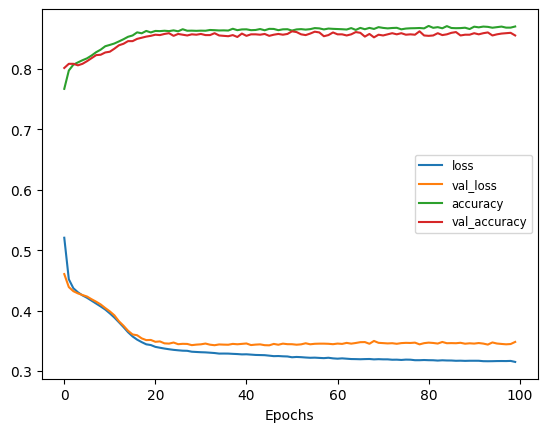

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.legend(loc='center right', fontsize='small')
plt.show()

### Here We can see that model got overfitted after 15 epochs